In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS

In [2]:
file1="c:/temp/final_edit_iv.csv"
data1=pd.read_csv(file1)
data1

,district.e,year,school.zone,population,vehicle,childaccident.schoolzone,trafficsafetyindex,elderlyaccident,violation.sum,No.safedriving,centerline,speeding,signal,Intersection,safety.distance,hitandrun,narrow.road,population.density
0,jongno,2019,49.0,73947.0,50052.0,20.0,79.77,184.0,1133.0,613.0,24.0,0.0,155.0,45.0,188.0,20.0,212144.0,6769.0
1,jung,2019,41.0,62739.0,51736.0,24.0,75.09,151.0,1184.0,576.0,28.0,4.0,174.0,29.0,279.0,16.0,68503.0,13704.0
2,yongsan,2019,39.0,110126.0,76521.0,27.0,79.64,144.0,1187.0,674.0,45.0,6.0,116.0,25.0,216.0,33.0,198093.0,11213.0
3,seongdong,2019,52.0,135838.0,106263.0,45.0,79.60,162.0,1091.0,589.0,24.0,2.0,153.0,50.0,167.0,11.0,334184.0,18327.0
4,gwangjin,2019,80.0,164428.0,99299.0,45.0,83.22,128.0,973.0,549.0,16.0,1.0,113.0,64.0,102.0,29.0,267111.0,21507.0
5,dongdaemun,2019,71.0,164191.0,97910.0,41.0,74.03,315.0,1565.0,818.0,45.0,4.0,211.0,38.0,226.0,29.0,252456.0,25537.0
6,jungnang,2019,44.0,181579.0,112723.0,65.0,77.13,276.0,1620.0,781.0,61.0,5.0,189.0,129.0,213.0,25.0,255808.0,21736.0
7,seongbuk,2019,105.0,192592.0,119321.0,59.0,81.42,262.0,1509.0,772.0,43.0,2.0,213.0,45.0,230.0,15.0,548212.0,18505.0
8,gangbuk,2019,43.0,144277.0,76364.0,59.0,78.66,217.0,1277.0,727.0,48.0,1.0,150.0,34.0,123.0,20.0,180935.0,13462.0
9,dobong,2019,74.0,138508.0,96435.0,42.0,81.71,189.0,852.0,445.0,30.0,3.0,154.0,17.0,67.0,12.0,209740.0,16245.0


In [4]:
# OLS 1
y=data1['childaccident.schoolzone']
x=data1['school.zone']
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                       0.402
Model:                                  OLS   Adj. R-squared:                  0.389
Method:                       Least Squares   F-statistic:                     32.24
Date:                      Mon, 19 Jun 2023   Prob (F-statistic):           7.75e-07
Time:                              01:15:45   Log-Likelihood:                -219.55
No. Observations:                        50   AIC:                             443.1
Df Residuals:                            48   BIC:                             446.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.2986      9.149      0.579      0.565     -13.096      23.694
school.zone     0.7148      0.126      5.678      0.000       0.462       0.968
==============================================================================
Omnibus:                        9.725   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.113
Skew:                           0.927   Prob(JB):                       0.0105
Kurtosis:                       3.969   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# OLS 2
y=data1['childaccident.schoolzone']
x=data1[['school.zone','trafficsafetyindex','centerline','No.safedriving','speeding','signal','Intersection','safety.distance','hitandrun']]
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                       0.782
Model:                                  OLS   Adj. R-squared:                  0.733
Method:                       Least Squares   F-statistic:                     15.94
Date:                      Mon, 19 Jun 2023   Prob (F-statistic):           1.17e-10
Time:                              01:17:36   Log-Likelihood:                -194.32
No. Observations:                        50   AIC:                             408.6
Df Residuals:                            40   BIC:                             427.8
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -84.3866     78.638     -1.073      0.290    -243.321      74.548
school.zone            0.3665      0.113      3.230      0.002       0.137       0.596
trafficsafetyindex     0.8157      0.943      0.865      0.392      -1.090       2.721
centerline             0.3583      0.228      1.571      0.124      -0.103       0.819
No.safedriving         0.0168      0.019      0.907      0.370      -0.021       0.054
speeding              -0.9599      0.944     -1.017      0.315      -2.867       0.947
signal                 0.1918      0.069      2.766      0.009       0.052       0.332
Intersection           0.1081      0.085      1.265      0.213      -0.065       0.281
safety.distance       -0.0340      0.042     -0.805      0.425      -0.119       0.051
hitandrun             -0.3575      0.228     -1.566      0.125      -0.819       0.104
==============================================================================
Omnibus:                        5.422   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.273
Skew:                          -0.629   Prob(JB):                        0.118
Kurtosis:                       3.683   Cond. No.                     4.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# OLS 3
y=data1['childaccident.schoolzone']
x=data1[['school.zone','trafficsafetyindex','violation.sum']]
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                       0.616
Model:                                  OLS   Adj. R-squared:                  0.591
Method:                       Least Squares   F-statistic:                     24.57
Date:                      Mon, 19 Jun 2023   Prob (F-statistic):           1.22e-09
Time:                              02:11:12   Log-Likelihood:                -208.48
No. Observations:                        50   AIC:                             425.0
Df Residuals:                            46   BIC:                             432.6
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 33.8802     85.902      0.394      0.695    -139.032     206.792
school.zone            0.4941      0.123      4.022      0.000       0.247       0.741
trafficsafetyindex    -0.5257      1.037     -0.507      0.615      -2.613       1.562
violation.sum          0.0177      0.007      2.717      0.009       0.005       0.031
==============================================================================
Omnibus:                       12.271   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.457
Skew:                          -0.481   Prob(JB):                     6.62e-07
Kurtosis:                       6.568   Cond. No.                     6.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# OLS 4
y=data1['school.zone']
x=data1['childaccident.schoolzone']
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            school.zone   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     32.24
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           7.75e-07
Time:                        01:20:08   Log-Likelihood:                -213.54
No. Observations:                  50   AIC:                             431.1
Df Residuals:                      48   BIC:                             434.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       38.3803      5.966      6.433      0.000      26.385      50.376
childaccident.schoolzone     0.5621      0.099      5.678      0.000       0.363       0.761
==============================================================================
Omnibus:                        1.796   Durbin-Watson:                   2.378
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.413
Skew:                           0.221   Prob(JB):                        0.493
Kurtosis:                       2.305   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# OLS 5
y=data1['school.zone']
x=data1[['childaccident.schoolzone','violation.sum']]
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            school.zone   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     15.80
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           5.66e-06
Time:                        03:59:51   Log-Likelihood:                -213.53
No. Observations:                  50   AIC:                             433.1
Df Residuals:                      47   BIC:                             438.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       38.7683      6.918      5.604      0.000      24.851      52.686
childaccident.schoolzone     0.5729      0.138      4.166      0.000       0.296       0.850
violation.sum               -0.0006      0.005     -0.114      0.909      -0.012       0.010
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.385
Skew:                           0.209   Prob(JB):                        0.500
Kurtosis:                       2.299   Cond. No.                     4.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# 2SLS 1

dependent = data1['childaccident.schoolzone']
data1['const']=1
exog = data1['const']
endog = data1['school.zone']
instruments = data1['population.density']

model = IV2SLS(dependent, exog, endog, instruments)
result = model.fit()
result.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                             IV-2SLS Estimation Summary                             
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                      0.2453
Estimator:                          IV-2SLS   Adj. R-squared:                 0.2296
No. Observations:                        50   F-statistic:                    4.8841
Date:                      Mon, Jun 19 2023   P-value (F-stat)                0.0271
Time:                              01:24:48   Distribution:                  chi2(1)
Cov. Estimator:                      robust                                         
                                                                                    
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const          -25.541     35.975    -0.7100     0.4777     -96.051      44.969
school.zone     1.1608     0.5253     2.2100     0.0271      0.1313      2.1904
===============================================================================

Endogenous: school.zone
Instruments: population.density
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [15]:
# Exclusion condition 1
y=data1['childaccident.schoolzone']
x=data1['population.density']
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                       0.060
Model:                                  OLS   Adj. R-squared:                  0.040
Method:                       Least Squares   F-statistic:                     3.067
Date:                      Mon, 19 Jun 2023   Prob (F-statistic):             0.0863
Time:                              01:27:02   Log-Likelihood:                -230.84
No. Observations:                        50   AIC:                             465.7
Df Residuals:                            48   BIC:                             469.5
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 31.8809     13.512      2.360      0.022       4.714      59.048
population.density     0.0013      0.001      1.751      0.086      -0.000       0.003
==============================================================================
Omnibus:                        9.987   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.466
Skew:                           0.992   Prob(JB):                      0.00880
Kurtosis:                       3.781   Cond. No.                     6.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Relevance condition 1
y=data1['school.zone']
x=data1['population.density']
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            school.zone   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.884
Date:                Mon, 19 Jun 2023   Prob (F-statistic):             0.0960
Time:                        01:27:27   Log-Likelihood:                -224.93
No. Observations:                  50   AIC:                             453.9
Df Residuals:                      48   BIC:                             457.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 49.4655     12.004      4.121      0.000      25.331      73.600
population.density     0.0011      0.001      1.698      0.096      -0.000       0.002
==============================================================================
Omnibus:                        3.592   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                3.056
Skew:                           0.502   Prob(JB):                        0.217
Kurtosis:                       2.323   Cond. No.                     6.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

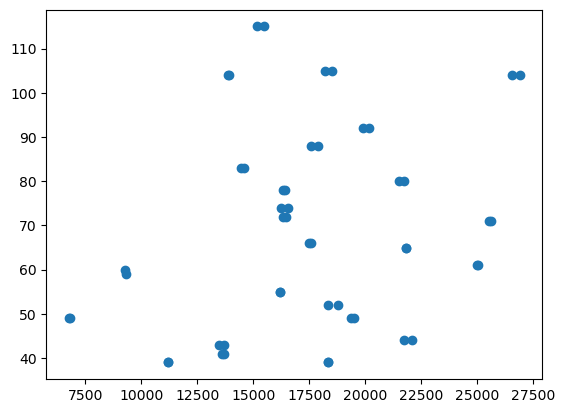

In [19]:
plt.scatter(data1['population.density'],data1['school.zone'])
plt.show()

In [12]:
# 2SLS 2

dependent = data1['childaccident.schoolzone']
data1['const']=1
exog = data1['const']
endog = data1['school.zone']
instruments = data1['narrow.road']

model = IV2SLS(dependent, exog, endog, instruments)
result = model.fit()
result.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                             IV-2SLS Estimation Summary                             
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                      0.4004
Estimator:                          IV-2SLS   Adj. R-squared:                 0.3879
No. Observations:                        50   F-statistic:                    10.293
Date:                      Mon, Jun 19 2023   P-value (F-stat)                0.0013
Time:                              01:24:52   Distribution:                  chi2(1)
Cov. Estimator:                      robust                                         
                                                                                    
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           8.1972     14.533     0.5640     0.5727     -20.287      36.682
school.zone     0.6729     0.2097     3.2083     0.0013      0.2618      1.0839
===============================================================================

Endogenous: school.zone
Instruments: narrow.road
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [18]:
# Exclusion condition
y=data1['childaccident.schoolzone']
x=data1['narrow.road']
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                       0.074
Model:                                  OLS   Adj. R-squared:                  0.055
Method:                       Least Squares   F-statistic:                     3.830
Date:                      Mon, 19 Jun 2023   Prob (F-statistic):             0.0562
Time:                              01:28:13   Log-Likelihood:                -230.47
No. Observations:                        50   AIC:                             464.9
Df Residuals:                            48   BIC:                             468.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          34.6351     10.845      3.194      0.002      12.829      56.441
narrow.road    7.9e-05   4.04e-05      1.957      0.056   -2.16e-06       0.000
==============================================================================
Omnibus:                       10.871   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.812
Skew:                           0.941   Prob(JB):                      0.00449
Kurtosis:                       4.283   Cond. No.                     8.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Relevance condition 2
y=data1['school.zone']
x=data1['narrow.road']
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            school.zone   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     12.57
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           0.000886
Time:                        01:27:58   Log-Likelihood:                -220.57
No. Observations:                  50   AIC:                             445.1
Df Residuals:                      48   BIC:                             449.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          39.2908      8.897      4.416      0.000      21.403      57.179
narrow.road     0.0001   3.31e-05      3.546      0.001    5.08e-05       0.000
==============================================================================
Omnibus:                        4.135   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.356
Skew:                           0.628   Prob(JB):                        0.187
Kurtosis:                       3.184   Cond. No.                     8.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

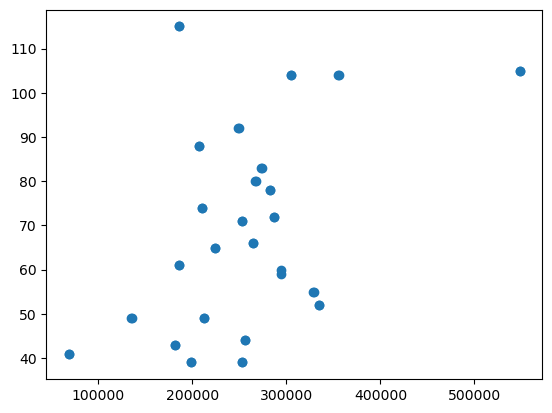

In [20]:
plt.scatter(data1['narrow.road'],data1['school.zone'])
plt.show()

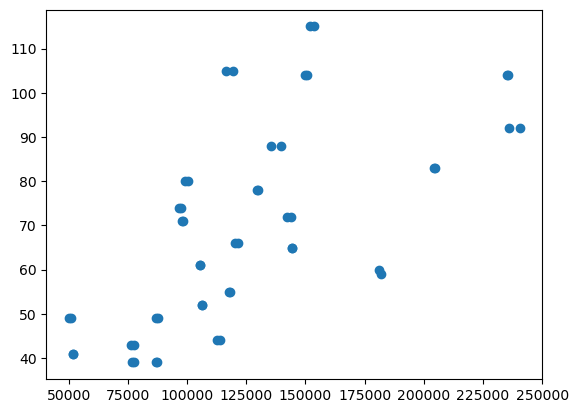

In [21]:
plt.scatter(data1['vehicle'],data1['school.zone'])
plt.show()

In [25]:
# 2SLS 3

dependent = data1['childaccident.schoolzone']
data1['const']=1
exog = data1['const']
endog = data1['school.zone']
instruments = data1['vehicle']

model = IV2SLS(dependent, exog, endog, instruments)
result = model.fit()
result.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                             IV-2SLS Estimation Summary                             
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                      0.0667
Estimator:                          IV-2SLS   Adj. R-squared:                 0.0473
No. Observations:                        50   F-statistic:                    34.097
Date:                      Mon, Jun 19 2023   P-value (F-stat)                0.0000
Time:                              01:32:53   Distribution:                  chi2(1)
Cov. Estimator:                      robust                                         
                                                                                    
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const          -39.835     15.686    -2.5394     0.0111     -70.580     -9.0898
school.zone     1.3676     0.2342     5.8393     0.0000      0.9085      1.8266
===============================================================================

Endogenous: school.zone
Instruments: vehicle
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [26]:
# Relevance condition 3
y=data1['school.zone']
x=data1['vehicle']
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            school.zone   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     36.19
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           2.37e-07
Time:                        01:33:22   Log-Likelihood:                -212.34
No. Observations:                  50   AIC:                             428.7
Df Residuals:                      48   BIC:                             432.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1821      6.765      4.609      0.000      17.580      44.785
vehicle        0.0003   5.05e-05      6.016      0.000       0.000       0.000
==============================================================================
Omnibus:                        5.120   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.866
Skew:                           0.761   Prob(JB):                       0.0878
Kurtosis:                       2.851   Cond. No.                     3.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Exclusion condition
y=data1['childaccident.schoolzone']
x=data1['vehicle']
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                       0.632
Model:                                  OLS   Adj. R-squared:                  0.625
Method:                       Least Squares   F-statistic:                     82.52
Date:                      Mon, 19 Jun 2023   Prob (F-statistic):           5.33e-12
Time:                              01:34:17   Log-Likelihood:                -207.38
No. Observations:                        50   AIC:                             418.8
Df Residuals:                            48   BIC:                             422.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8095      6.127      0.459      0.649      -9.510      15.129
vehicle        0.0004   4.57e-05      9.084      0.000       0.000       0.001
==============================================================================
Omnibus:                       36.052   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.559
Skew:                          -1.745   Prob(JB):                     4.07e-32
Kurtosis:                      10.563   Cond. No.                     3.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

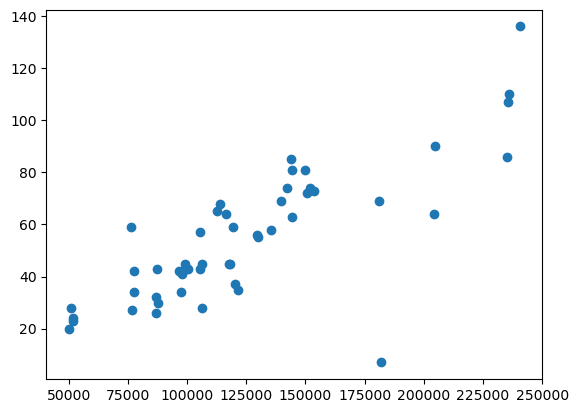

In [32]:
plt.scatter(data1['vehicle'],data1['childaccident.schoolzone'])
plt.show()

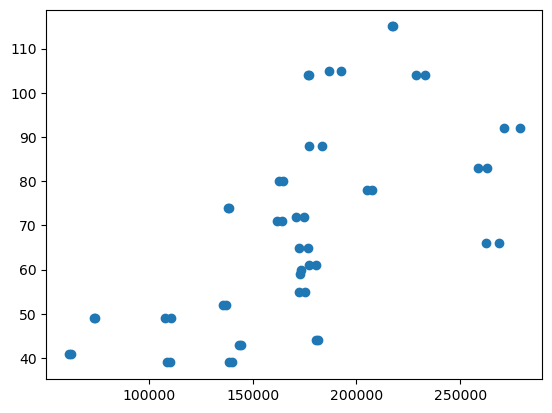

In [22]:
plt.scatter(data1['population'],data1['school.zone'])
plt.show()

In [24]:
# 2SLS 4

dependent = data1['childaccident.schoolzone']
data1['const']=1
exog = data1['const']
endog = data1['school.zone']
instruments = data1['population']

model = IV2SLS(dependent, exog, endog, instruments)
result = model.fit()
result.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                             IV-2SLS Estimation Summary                             
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                      0.1948
Estimator:                          IV-2SLS   Adj. R-squared:                 0.1780
No. Observations:                        50   F-statistic:                    34.134
Date:                      Mon, Jun 19 2023   P-value (F-stat)                0.0000
Time:                              01:31:54   Distribution:                  chi2(1)
Cov. Estimator:                      robust                                         
                                                                                    
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const          -30.175     13.475    -2.2393     0.0251     -56.586     -3.7647
school.zone     1.2279     0.2102     5.8425     0.0000      0.8160      1.6398
===============================================================================

Endogenous: school.zone
Instruments: population
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [31]:
# Relevance condition 4
y=data1['school.zone']
x=data1['population']
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            school.zone   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     32.58
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           6.99e-07
Time:                        01:35:27   Log-Likelihood:                -213.44
No. Observations:                  50   AIC:                             430.9
Df Residuals:                      48   BIC:                             434.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3651      8.566      2.611      0.012       5.141      39.589
population     0.0003   4.77e-05      5.708      0.000       0.000       0.000
==============================================================================
Omnibus:                        2.200   Durbin-Watson:                   2.388
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                2.022
Skew:                           0.400   Prob(JB):                        0.364
Kurtosis:                       2.425   Cond. No.                     6.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Exclusion condition
y=data1['childaccident.schoolzone']
x=data1['population']
X=sm.add_constant(x)
result=sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     childaccident.schoolzone   R-squared:                       0.479
Model:                                  OLS   Adj. R-squared:                  0.469
Method:                       Least Squares   F-statistic:                     44.19
Date:                      Mon, 19 Jun 2023   Prob (F-statistic):           2.55e-08
Time:                              01:34:40   Log-Likelihood:                -216.08
No. Observations:                        50   AIC:                             436.2
Df Residuals:                            48   BIC:                             440.0
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7137      9.031     -0.300      0.765     -20.872      15.444
population     0.0003   5.03e-05      6.648      0.000       0.000       0.000
==============================================================================
Omnibus:                        7.679   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.324
Skew:                          -0.559   Prob(JB):                       0.0156
Kurtosis:                       4.657   Cond. No.                     6.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

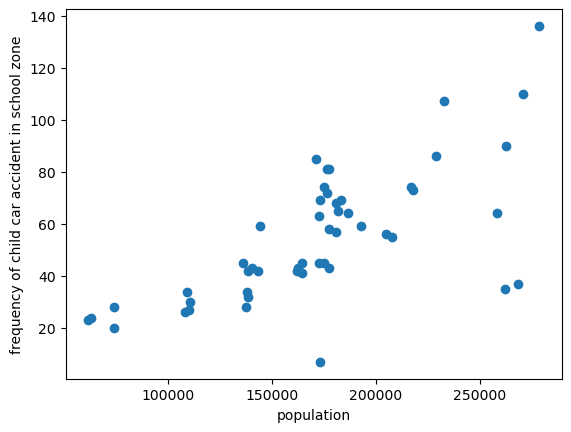

In [36]:
plt.scatter(data1['population'],data1['childaccident.schoolzone'])
plt.xlabel('population')
plt.ylabel('frequency of child car accident in school zone')
plt.show()

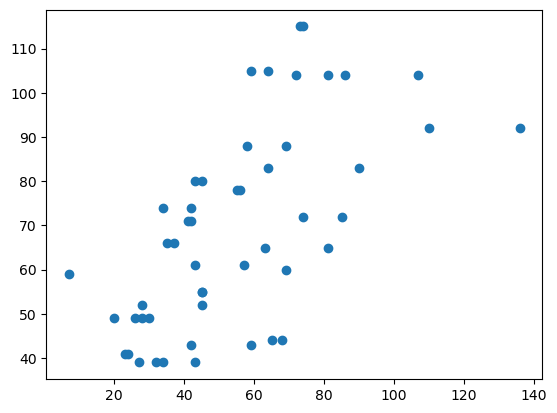

In [33]:
plt.scatter(data1['childaccident.schoolzone'],data1['school.zone'])
plt.show()

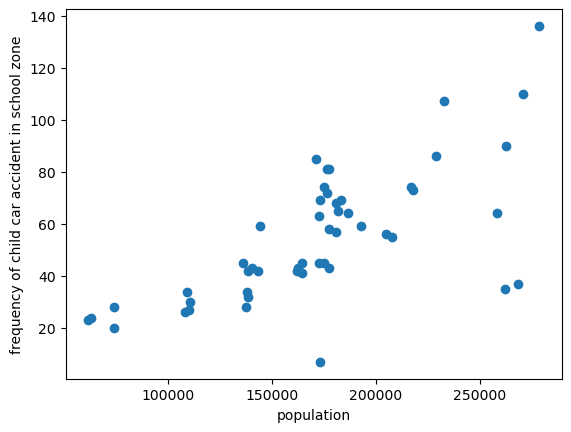

In [37]:
plt.scatter(data1['population'],data1['childaccident.schoolzone'])
plt.xlabel('population')
plt.ylabel('frequency of child car accident in school zone')
plt.show()

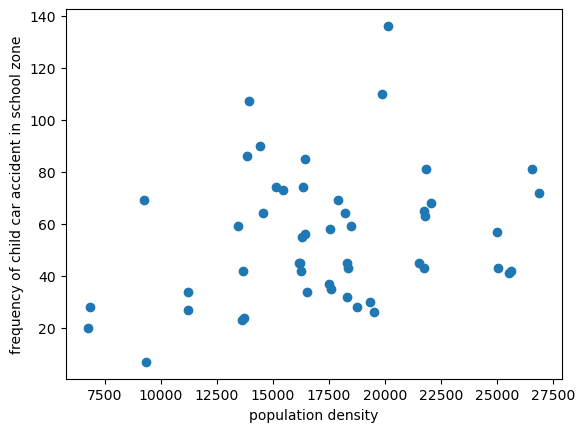

In [38]:
plt.scatter(data1['population.density'],data1['childaccident.schoolzone'])
plt.xlabel('population density')
plt.ylabel('frequency of child car accident in school zone')
plt.show()

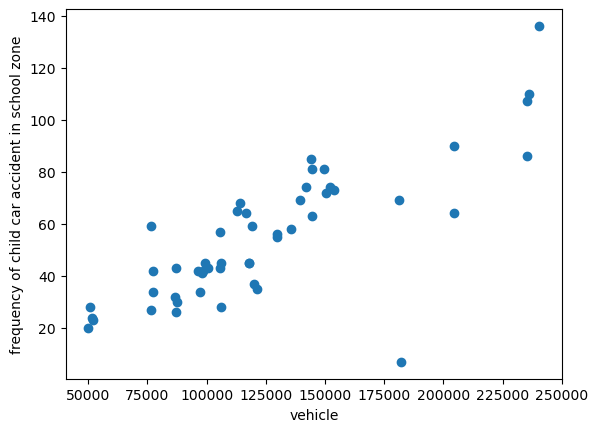

In [39]:
plt.scatter(data1['vehicle'],data1['childaccident.schoolzone'])
plt.xlabel('vehicle')
plt.ylabel('frequency of child car accident in school zone')
plt.show()

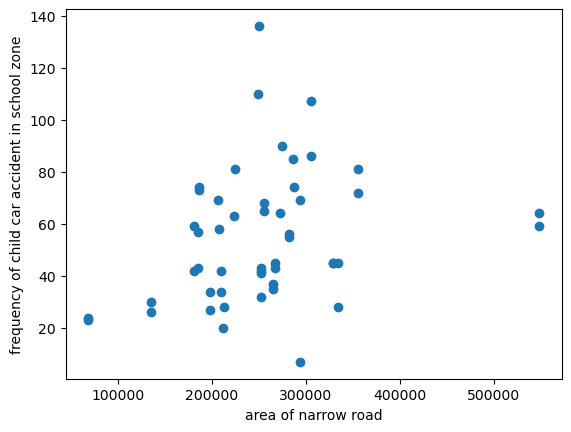

In [41]:
plt.scatter(data1['narrow.road'],data1['childaccident.schoolzone'])
plt.xlabel('area of narrow road')
plt.ylabel('frequency of child car accident in school zone')
plt.show()